# Canny Edge Detection ImgPyramids

内容：

- openCV Python

版本：

- python 3.7.3

- openCV 4.1.0.25

官方文档：

- [tutorial](https://docs.opencv.org/3.1.0/d6/d00/tutorial_py_root.html)

知识点树：

![MapOfFunction](img/Canny_Edge_Detection_ImgP.png)

## 0. 应用库的加载

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

from ipywidgets import interact

## 1. Canny 边缘检测

目标：

- Canny 边缘检测的意义

- `cv2.Canny()`

### 原理

Canny 边缘检测是一个很流行的边缘检测算法，是 John F. Canny 发扬光大的，包含4个阶段：

1. 降噪：

由于边缘检测易受图像噪声的影响（susceptible）,第一步就是通过 5x5 的高斯滤波器去除噪声。

2. 找出图像的强度梯度

平滑后的图像继续经过 Sobel 滤波器在水平和竖直方向得到水平方向和竖直方向的导数，利用这两个结果可以通过以下方式找到任意像素的边缘梯度和方向：

$$Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2} \\ Angle \; (\theta) = \tan^{-1} \bigg(\frac{G_y}{G_x}\bigg)$$

梯度的方向总是垂直与边缘（perpendicular），通过四舍五入成4个角分别代表垂直，水平，和两对角方向

3. Non-maximum Suppression（非最大值抑制）

在获得梯度大小和方向之后，全扫描图像以移除所有多余的不属于连续边缘的梯度，对此，每一个像素都会经过判断：是否为梯度方向的局部最大值：

![梯度示意图](img/cannyGradient.jpg)

A 在垂直方向得边缘，梯度方向是垂直于边缘的，B与C也都在梯度方向上，检查A是否为局部最大值，若是，则进行下一步，若不是则抑制（suppressed）置为零，简单来说，你得到的结果是一个拥有很细的边缘的二值图像。

4. Hysteresis Thresholding（滞后阈值）

这个阶段会判断所有的边缘，有哪些是真正的边缘，设置两个阈值，最低阈值和最高阈值，所有的边缘强度梯度高于最高阈值的一定是边缘，低于最低阈值的一定是非边缘，直接抛弃，在两个阈值中间的根据他们与其他边缘的连接情况分类，如果与确定边界连接了，那么一定是边缘，如果与非边界连接那么就抛弃掉。边缘 A 在最大阈值之上，所以被认为是确定性的边界，尽管 C 在最大值之下，然而因为其与 A 相连，所以也被认为是有效的边界，但是 B 虽然在最低值以上，并且和 C 在同一个区域，由于它并没有与有效的边界相连接，所以丢弃，要合理地选择最低值和最高值来获得最好的结果。这个阶段同样也移除了小的像素噪声（通过保留长边界的方式）

![hysteresis](img/hysteresis.jpg)

Example：

OpenCV 用一个简单的函数实现`cv2.Canny()`:

- img

- minVal

- maxVal

- aperture_size: Sobel kernel 的大小，默认为 3 

- L2gradient（True False）

    - 如果是True会用到以上提及的公式
    
    - 如果为False会应用$Edge \; Gradient(G)=|Gx|+|Gy|$,默认为此选项

In [7]:
img = cv2.imread('img/liefeng.jpg',0)
def f(minVal,maxVal):
    edges = cv2.Canny(img,minVal,maxVal)

    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()

a = interact(f,minVal=(0,255),maxVal=(0,255))

interactive(children=(IntSlider(value=127, description='minVal', max=255), IntSlider(value=127, description='m…

### 高阶资料

[Canny edge dection 维基百科](https://en.wikipedia.org/wiki/Canny_edge_detector)

## 2. Image Pyramids

目标：

- 图像金字塔

- 混合图像

- 核心函数：

    - `cv2.pyrUp()`
    
    - `cv2.pyrDown()`

- 原理：

    - 通常来说，我们会处理一个常规尺寸的图像，但是在某些情况下，我们需要处理同一张图片的不同尺寸的子图，例如当在图片中搜索目标的时候，比如人脸，我们不清楚哪部分目标会呈现在图像中，在这种情况下，我们会需要创造一系列不同尺寸的图片，并且在所有的图像中都去搜索目标物体，这些不同尺寸的图像成为图像金字塔，（因为当图像储存在栈中时，大尺寸图像会放在最底部，小尺寸图像会放在最上面，看起来就像一个金字塔一样）

有两种不同种类的图像金字塔：

1. 高斯金字塔

2. 拉普拉斯金字塔

在高斯金字塔中，高层次（低分辨率）的金字塔通过移除连续的行和列像素形成的。每一个在更高级别的像素点都是通过更底层的5个像素确定的（通过高斯权重），通过这样做，一个 MxN 的图像变成了 M/2xN/2 的图像，所以区域减至了四分之一原图，这叫一次8分（Octave），随着我们继续用同样的模式达到金字塔的更高级别。

函数：

- `cv2.pyrDown()`

- `cv2.pyrUp()`


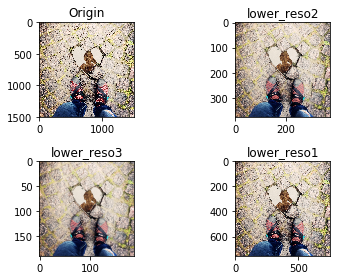

In [14]:
img = cv2.imread('img/example.jpg')
lower_reso1 = cv2.pyrDown(img)
lower_reso2 = cv2.pyrDown(lower_reso1)
lower_reso3 = cv2.pyrDown(lower_reso2)
reso1 = cv2.pyrUp(lower_reso2)

fig = plt.figure()

plt.subplot(221),plt.imshow(img[:,:,::-1]),plt.title('Origin')
plt.subplot(222),plt.imshow(lower_reso2[:,:,::-1]),plt.title('lower_reso2')
plt.subplot(223),plt.imshow(lower_reso3[:,:,::-1]),plt.title('lower_reso3')
plt.subplot(224),plt.imshow(lower_reso1[:,:,::-1]),plt.title('lower_reso1')

fig.tight_layout()
plt.show()

上图中lower_reso1是由lower_reso2得到的，但是经过了lower_reso2的步骤，图像的清晰度就损失了

拉普拉斯金字塔是由高斯金字塔形成的，没有具体实现的函数，拉普拉斯金字塔图像就像边缘图像，大多数像素值都为 0，常用于图像压缩，一个拉普拉斯金字塔的级别是由高斯金字塔和它上一级别（低分辨率）图像的膨胀图像的差值得到的。

Example：

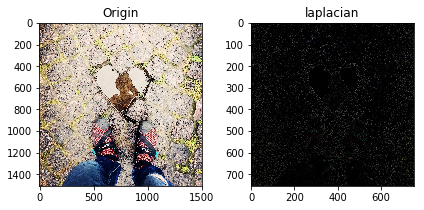

In [15]:
img = cv2.imread('img/example.jpg')
lower_reso1 = cv2.pyrDown(img)
lower_reso2 = cv2.pyrDown(lower_reso1)
lower_reso3 = cv2.pyrDown(lower_reso2)
reso1 = cv2.pyrUp(lower_reso2)
laplacian = cv2.subtract(reso1,lower_reso1)

fig = plt.figure()

plt.subplot(121),plt.imshow(img[:,:,::-1]),plt.title('Origin')
plt.subplot(122),plt.imshow(laplacian[:,:,::-1]),plt.title('laplacian')

fig.tight_layout()
plt.show()

### Image Blending using Pyramids

金字塔可以用于图像的混合，将混合边缘平滑的过渡